In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("../data/raw/wfp/wfp_food_prices_eastern_africa_2019-2025_10countries_118487records.csv")
df[df['countryiso3']=='KEN']['commodity'].unique()

array(['Maize', 'Maize (white)', 'Beans (dry)', 'Beans', 'Sorghum',
       'Oil (vegetable)', 'Wheat flour', 'Rice', 'Maize flour',
       'Beans (kidney)', 'Beans (mung)', 'Beans (rosecoco)',
       'Beans (yellow)', 'Cowpeas', 'Maize (white, dry)',
       'Millet (finger)', 'Rice (aromatic)', 'Sorghum (red)',
       'Sorghum (white)', 'Beans (dolichos)', 'Rice (imported, Pakistan)',
       'Oil (vegetable, fortified)', 'Maize flour (white)',
       'Cowpeas (dry)'], dtype=object)

In [35]:
df.head()

,countryiso3,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,BDI,2019-01-15,Bubanza,Mpanda,Musenyi,1827,-3.17,29.40,cereals and tubers,Cassava flour,74,KG,actual,Retail,BIF,512.00,0.29
1,RWA,2019-01-15,Southern Province,Nyamagabe,Kabacuzi,1065,-2.47,29.58,cereals and tubers,"Rice (long grain, high quality, local)",379,KG,actual,Retail,RWF,702.50,0.79
2,RWA,2019-01-15,Southern Province,Nyamagabe,Kabacuzi,1065,-2.47,29.58,cereals and tubers,Maize flour,76,KG,actual,Retail,RWF,383.33,0.43
3,RWA,2019-01-15,Southern Province,Nyamagabe,Kabacuzi,1065,-2.47,29.58,cereals and tubers,Maize,51,KG,actual,Retail,RWF,260.00,0.29
4,RWA,2019-01-15,Southern Province,Nyamagabe,Gasarenda,1057,-2.51,29.48,vegetables and fruits,Cassava leaves,455,KG,actual,Retail,RWF,200.00,0.22


In [36]:
#1. Basic information
df.groupby('countryiso3')['commodity'].nunique()
df.groupby('countryiso3')['date'].nunique() #different date available for each country
df.groupby('countryiso3')['date'].min() #15days internval

countryiso3
BDI    2019-01-15
DJI    2019-01-15
ETH    2019-01-15
KEN    2019-01-15
MDG    2019-01-15
RWA    2019-01-15
SOM    2019-01-15
SSD    2019-01-15
TZA    2019-01-15
UGA    2019-01-15
Name: date, dtype: object

In [37]:
df

,countryiso3,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,BDI,2019-01-15,Bubanza,Mpanda,Musenyi,1827,-3.17,29.40,cereals and tubers,Cassava flour,74,KG,actual,Retail,BIF,512.00,0.29
1,RWA,2019-01-15,Southern Province,Nyamagabe,Kabacuzi,1065,-2.47,29.58,cereals and tubers,"Rice (long grain, high quality, local)",379,KG,actual,Retail,RWF,702.50,0.79
2,RWA,2019-01-15,Southern Province,Nyamagabe,Kabacuzi,1065,-2.47,29.58,cereals and tubers,Maize flour,76,KG,actual,Retail,RWF,383.33,0.43
3,RWA,2019-01-15,Southern Province,Nyamagabe,Kabacuzi,1065,-2.47,29.58,cereals and tubers,Maize,51,KG,actual,Retail,RWF,260.00,0.29
4,RWA,2019-01-15,Southern Province,Nyamagabe,Gasarenda,1057,-2.51,29.48,vegetables and fruits,Cassava leaves,455,KG,actual,Retail,RWF,200.00,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118482,KEN,2025-10-15,North Eastern,Garissa,IFO (Daadab),3255,0.11,40.32,oil and fats,Oil (vegetable),96,L,aggregate,Retail,KES,250.00,1.93
118483,KEN,2025-10-15,North Eastern,Garissa,IFO (Daadab),3255,0.11,40.32,cereals and tubers,Wheat flour,58,KG,aggregate,Retail,KES,100.00,0.77
118484,KEN,2025-10-15,North Eastern,Garissa,IFO (Daadab),3255,0.11,40.32,cereals and tubers,Rice,52,KG,aggregate,Retail,KES,120.00,0.93
118485,KEN,2025-10-15,North Eastern,Garissa,IFO (Daadab),3255,0.11,40.32,cereals and tubers,Maize flour,76,KG,aggregate,Retail,KES,100.00,0.77


In [38]:
#1. OVerall inflation?
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
# Calculate overall inflation for each country
df.groupby(['countryiso3','market_id','commodity'])['date'].count()

# Create a copy to avoid SettingWithCopyWarning
sorgum_price = df[df['commodity']=='Sorghum'].copy()

# Extract numeric part from unit (e.g., "90 KG" -> 90, "KG" -> 1)
sorgum_price['unit_denomination'] = sorgum_price['unit'].str.extract(r'(\d+)')[0]
sorgum_price['unit_denomination'] = pd.to_numeric(sorgum_price['unit_denomination'], errors='coerce').fillna(1).astype(int)

# Calculate per unit price
sorgum_price['per_unit_price'] = sorgum_price['usdprice'] / sorgum_price['unit_denomination']


plotly.express.line(sorgum_price.groupby(['countryiso3','date'])['per_unit_price'].mean().reset_index().sort_values(by='date'), x='date', y='per_unit_price', color='countryiso3', title='Sorghum price in Eastern Africa')
# overall_inflation = df.groupby(['countryiso3', 'date'])['usdprice'].mean().reset_index()
# # sns.lineplot(data=overall_inflation, x='date', y='usdprice', hue='countryiso3')
# # plt.show()

# plotly.express.line(overall_inflation, x='date', y='usdprice', color='countryiso3')

In [58]:
#2. How much is the spatial pattern?
import numpy as np

# Sort by market_id and date to ensure proper ordering within each market
sorgum_price = sorgum_price.sort_values(by=['market_id', 'date'])

# Method 1: Simple inflation rate (Price_t / Price_{t-1})
sorgum_price['inflation_rate'] = sorgum_price.groupby('market_id')['per_unit_price'].pct_change()

# Method 2: Log inflation rate (recommended for modeling)
# log(Price_t) - log(Price_{t-1})
sorgum_price['log_inflation'] = sorgum_price.groupby('market_id')['per_unit_price'].transform(
    lambda x: np.log(x) - np.log(x.shift(1))
)

# Display summary to verify calculation is done per market
# print("Inflation calculation summary per market:")
# sorgum_price.groupby('market_id')[['inflation_rate', 'log_inflation']].agg(['count', 'mean', 'std']).head())

In [161]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a copy to avoid SettingWithCopyWarning
sorgum_price = sorgum_price.copy()
sorgum_price.dropna(subset=['inflation_rate'], inplace=True)

# Sort by market_id and date to ensure proper ordering within each market
sorgum_price = sorgum_price.sort_values(by=['market_id', 'date'])
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(sorgum_price[['inflation_rate']])
sorgum_price['cluster'] = kmeans.labels_
sorgum_price

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning:

divide by zero encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning:

overflow encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning:

invalid value encountered in matmul



,countryiso3,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,...,priceflag,pricetype,currency,price,usdprice,unit_denomination,per_unit_price,inflation_rate,log_inflation,cluster
18393,TZA,2020-05-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,72357.0,31.34,100,0.3134,0.054154,0.052739,0
19492,TZA,2020-06-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,75500.0,32.68,100,0.3268,0.042757,0.041868,0
20937,TZA,2020-07-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,69500.0,30.03,100,0.3003,-0.081089,-0.084566,7
25361,TZA,2020-10-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,63800.0,27.56,100,0.2756,-0.082251,-0.085831,7
26038,TZA,2020-11-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,64875.0,27.96,100,0.2796,0.014514,0.014409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93433,TZA,2024-05-15,Singida,Singida Urban,Namfua,9869,-4.83,34.76,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,100000.0,38.61,100,0.3861,-0.001810,-0.001811,0
97235,TZA,2024-07-15,Singida,Singida Urban,Namfua,9869,-4.83,34.76,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,90000.0,33.90,100,0.3390,-0.121989,-0.130096,7
100863,TZA,2024-09-15,Singida,Singida Urban,Namfua,9869,-4.83,34.76,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,100000.0,36.70,100,0.3670,0.082596,0.079362,8
105290,TZA,2024-12-15,Singida,Singida Urban,Namfua,9869,-4.83,34.76,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,100000.0,42.18,100,0.4218,0.149319,0.139169,8


In [162]:
# ===================================================================
# TIME-SERIES BASED CLUSTERING: Markets with similar inflation patterns
# ===================================================================

# Step 1: Pivot data - rows: date, columns: market_id, values: inflation_rate
inflation_pivot = sorgum_price.pivot_table(
    index='date', 
    columns='market_id', 
    values='inflation_rate',
    aggfunc='mean'  # In case of duplicates
)

print(f"Pivot shape: {inflation_pivot.shape}")
print(f"Date range: {inflation_pivot.index.min()} to {inflation_pivot.index.max()}")
print(f"Number of markets: {inflation_pivot.shape[1]}")
print(f"\nMissing data per market:")
print(inflation_pivot.isnull().sum().describe()) 

Pivot shape: (80, 161)
Date range: 2019-02-15 to 2025-09-15
Number of markets: 161

Missing data per market:
count    161.000000
mean      59.279503
std       14.988834
min       28.000000
25%       46.000000
50%       63.000000
75%       74.000000
max       79.000000
dtype: float64


In [163]:
# Step 2: Handle missing data
# Option A: Forward fill (assume price stays same if no data)
# Option B: Drop markets with too much missing data

# First, check which markets have enough data
min_observations = 20  # Minimum number of observations required
valid_markets = inflation_pivot.columns[inflation_pivot.notna().sum() >= min_observations]
print(f"Markets with >= {min_observations} observations: {len(valid_markets)} out of {len(inflation_pivot.columns)}")

# Filter to valid markets and forward fill remaining gaps
inflation_pivot_clean = inflation_pivot[valid_markets].fillna(method='ffill').fillna(method='bfill')

# Check remaining NaN
print(f"\nRemaining NaN values: {inflation_pivot_clean.isna().sum().sum()}")
print(f"Final shape: {inflation_pivot_clean.shape}")


Markets with >= 20 observations: 76 out of 161

Remaining NaN values: 0
Final shape: (80, 76)


/var/folders/t7/ldqv1xt97rs4jyjvhxf4shgw0000gn/T/ipykernel_93043/738931604.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [164]:
# Step 3: Transpose for clustering
# We want to cluster MARKETS (not dates), so markets should be rows
# Each market's time series becomes a feature vector
inflation_for_clustering = inflation_pivot_clean.T  # Now: rows = markets, columns = dates

print(f"Data for clustering shape: {inflation_for_clustering.shape}")
print(f"(markets x time_steps)")

# Step 4: Standardize the time series (important for distance-based clustering)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
inflation_scaled = scaler.fit_transform(inflation_for_clustering)

print(f"\nScaled data shape: {inflation_scaled.shape}")
print(f"Mean: {inflation_scaled.mean():.4f}, Std: {inflation_scaled.std():.4f}")


Data for clustering shape: (76, 80)
(markets x time_steps)

Scaled data shape: (76, 80)
Mean: 0.0000, Std: 1.0000


/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203

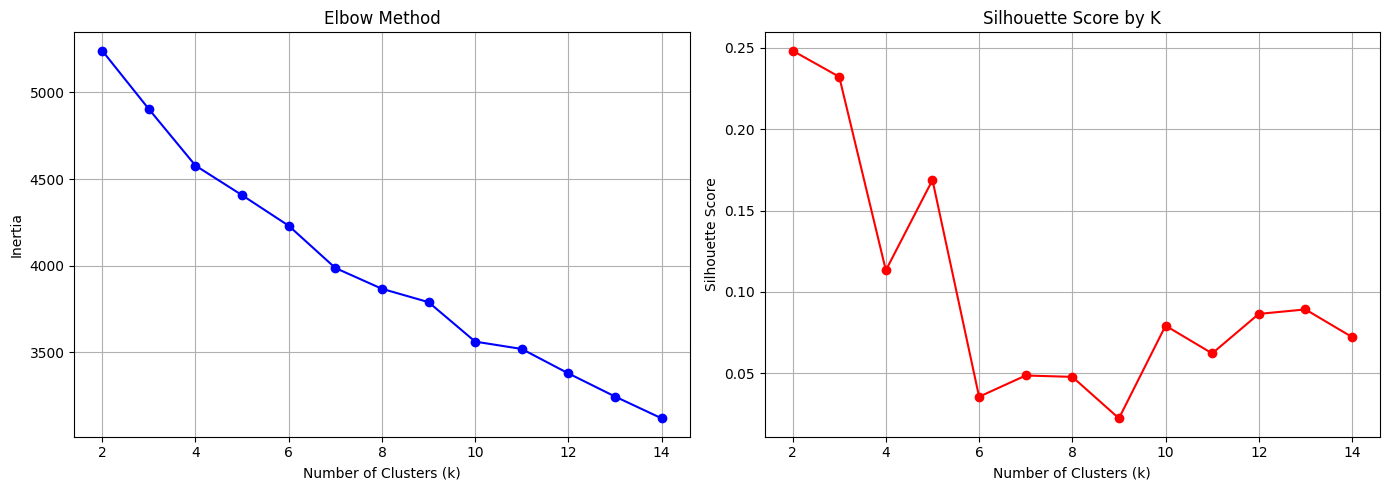

Silhouette scores:
k=2: 0.2482
k=3: 0.2322
k=4: 0.1133
k=5: 0.1688
k=6: 0.0356
k=7: 0.0487
k=8: 0.0478
k=9: 0.0224
k=10: 0.0793
k=11: 0.0623
k=12: 0.0865
k=13: 0.0893
k=14: 0.0723


In [182]:
# Step 5: Find optimal number of clusters using Elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(inflation_scaled)
    inertias.append(kmeans_temp.inertia_)
    
    from sklearn.metrics import silhouette_score
    score = silhouette_score(inflation_scaled, kmeans_temp.labels_)
    silhouette_scores.append(score)

# Plot elbow curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by K')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("Silhouette scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")


In [184]:
# Step 6: Perform final clustering (choose k based on above analysis)
optimal_k = 15  # You can adjust this based on elbow/silhouette results

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(inflation_scaled)

# Create a dataframe with market info and cluster labels
market_clusters = pd.DataFrame({
    'market_id': inflation_for_clustering.index,
    'cluster': cluster_labels
})

# Merge with original data to get market names and countries
market_info = sorgum_price[['market_id', 'market', 'countryiso3', 'latitude', 'longitude']].drop_duplicates()
market_clusters = market_clusters.merge(market_info, on='market_id', how='left')


/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/halimjun/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



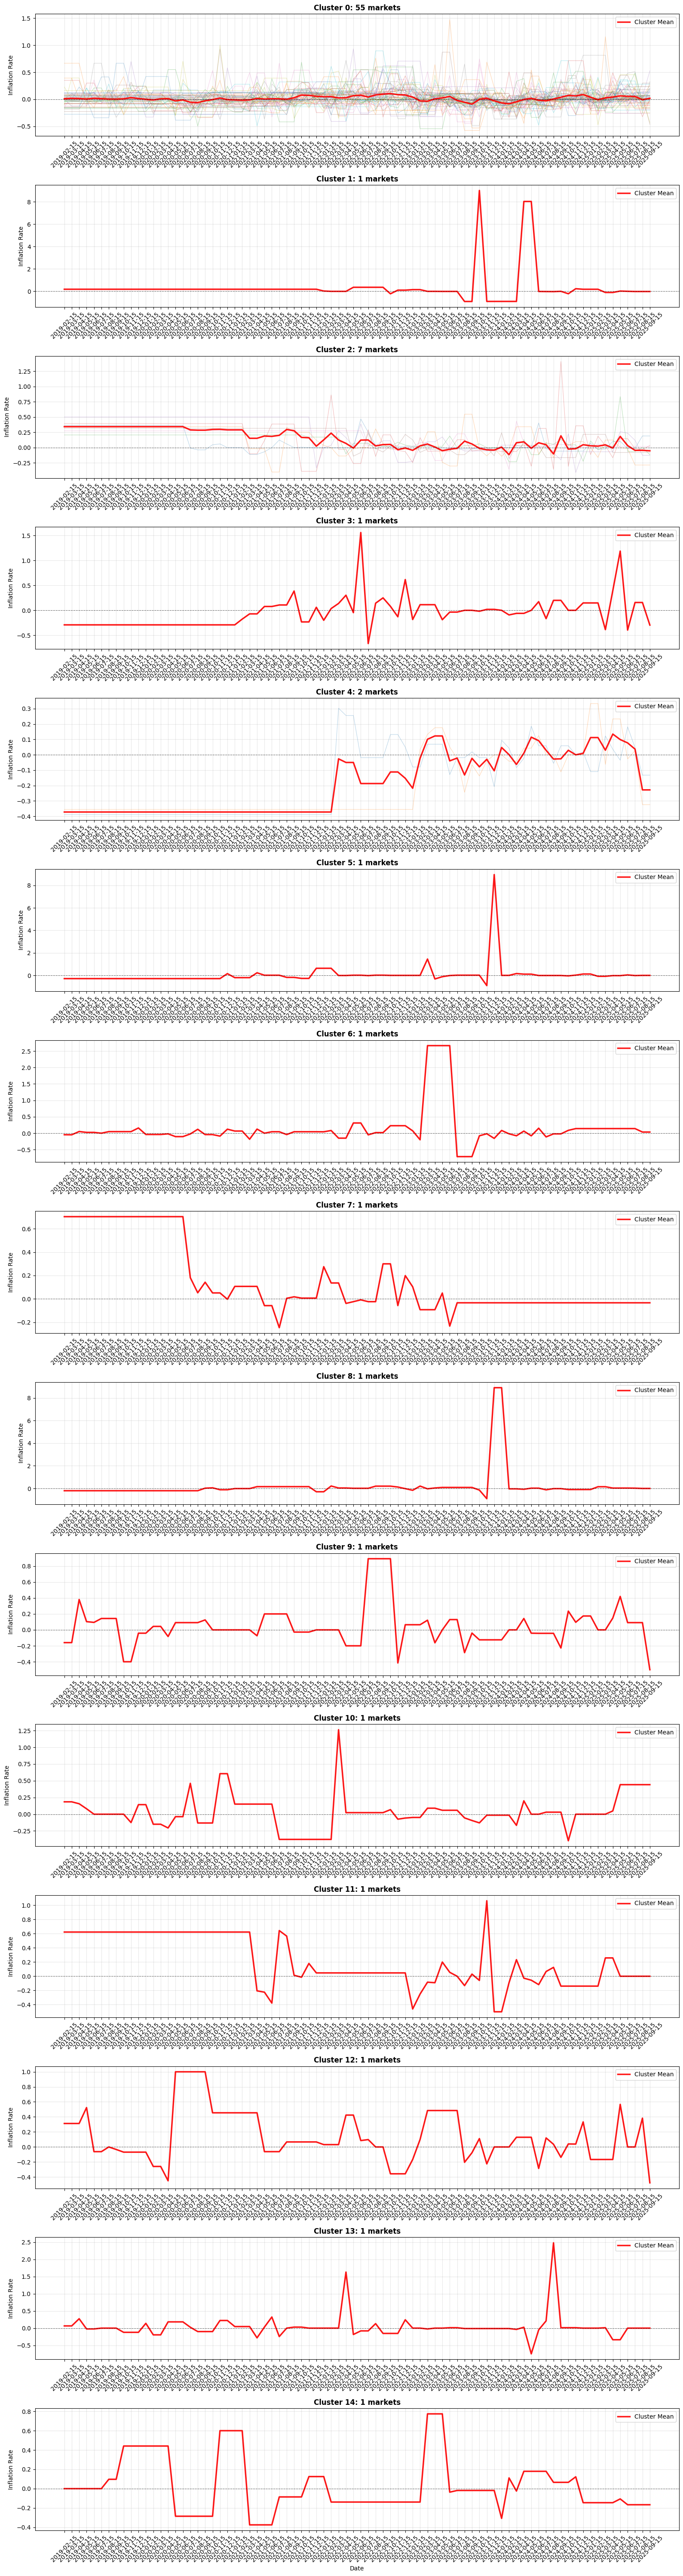


✅ Insight: Look for patterns like:
  - Which clusters show synchronized price spikes?
  - Are there stable clusters with low volatility?
  - Do some clusters show seasonal patterns?


In [185]:
# ===================================================================
# VISUALIZATION 1: Time series plot for each cluster
# ===================================================================

fig, axes = plt.subplots(optimal_k, 1, figsize=(16, 4*optimal_k))

for cluster_id in range(optimal_k):
    ax = axes[cluster_id] if optimal_k > 1 else axes
    
    # Get markets in this cluster
    cluster_markets = market_clusters[market_clusters['cluster'] == cluster_id]['market_id'].values
    
    # Plot each market's time series
    for market_id in cluster_markets:
        if market_id in inflation_pivot_clean.columns:
            ts = inflation_pivot_clean[market_id]
            ax.plot(ts.index, ts.values, alpha=0.3, linewidth=0.8)
    
    # Plot cluster mean (bold line)
    cluster_mean = inflation_pivot_clean[cluster_markets].mean(axis=1)
    ax.plot(cluster_mean.index, cluster_mean.values, 
            color='red', linewidth=2.5, label='Cluster Mean', alpha=0.9)
    
    ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.set_title(f'Cluster {cluster_id}: {len(cluster_markets)} markets', fontsize=12, fontweight='bold')
    ax.set_ylabel('Inflation Rate')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

print("\n✅ Insight: Look for patterns like:")
print("  - Which clusters show synchronized price spikes?")
print("  - Are there stable clusters with low volatility?")
print("  - Do some clusters show seasonal patterns?")


In [1]:
df

NameError: name 'df' is not defined

In [189]:
# ===================================================================
# VISUALIZATION 2: Geographic distribution of clusters
# ===================================================================

import plotly.express as px

# Create interactive map
fig = px.scatter_geo(
    market_clusters,
    lat='latitude',
    lon='longitude',
    color='cluster',
    hover_name='market',
    hover_data=['countryiso3', 'market_id'],
    title='Geographic Distribution of Market Clusters',
    size_max=15)
    

fig.update_layout(
    geo=dict(
        scope='africa',
        showland=True,
        landcolor='lightgray',
        coastlinecolor='white',
        projection_type='natural earth'
    ),
    height=600
)

fig.show()

print("\n✅ Insight: Check if clusters are:")
print("  - Geographically concentrated (regional effects)?")
print("  - Spread across countries (common economic shocks)?")
print("  - Border markets in same cluster (cross-border trade)?")



✅ Insight: Check if clusters are:
  - Geographically concentrated (regional effects)?
  - Spread across countries (common economic shocks)?
  - Border markets in same cluster (cross-border trade)?



📊 Cluster Statistics Summary:
    cluster  n_markets  mean_inflation  std_inflation  max_spike  min_drop  \
0         0         55          0.0155         0.1600     1.4750   -0.5746   
1         1          1          0.3463         1.6239     9.0083   -0.9059   
2         2          7          0.1408         0.2087     1.4074   -0.4082   
3         3          1         -0.0439         0.3200     1.5610   -0.6667   
4         4          2         -0.1872         0.2144     0.3333   -0.3889   
5         5          1          0.0517         1.0471     8.9600   -0.9064   
6         6          1          0.1373         0.6098     2.6667   -0.7136   
7         7          1          0.1559         0.2996     0.7030   -0.2454   
8         8          1          0.1858         1.4150     8.9029   -0.9039   
9         9          1          0.0480         0.2524     0.8929   -0.5000   
10       10          1          0.0325         0.2594     1.2632   -0.3971   
11       11          1          0

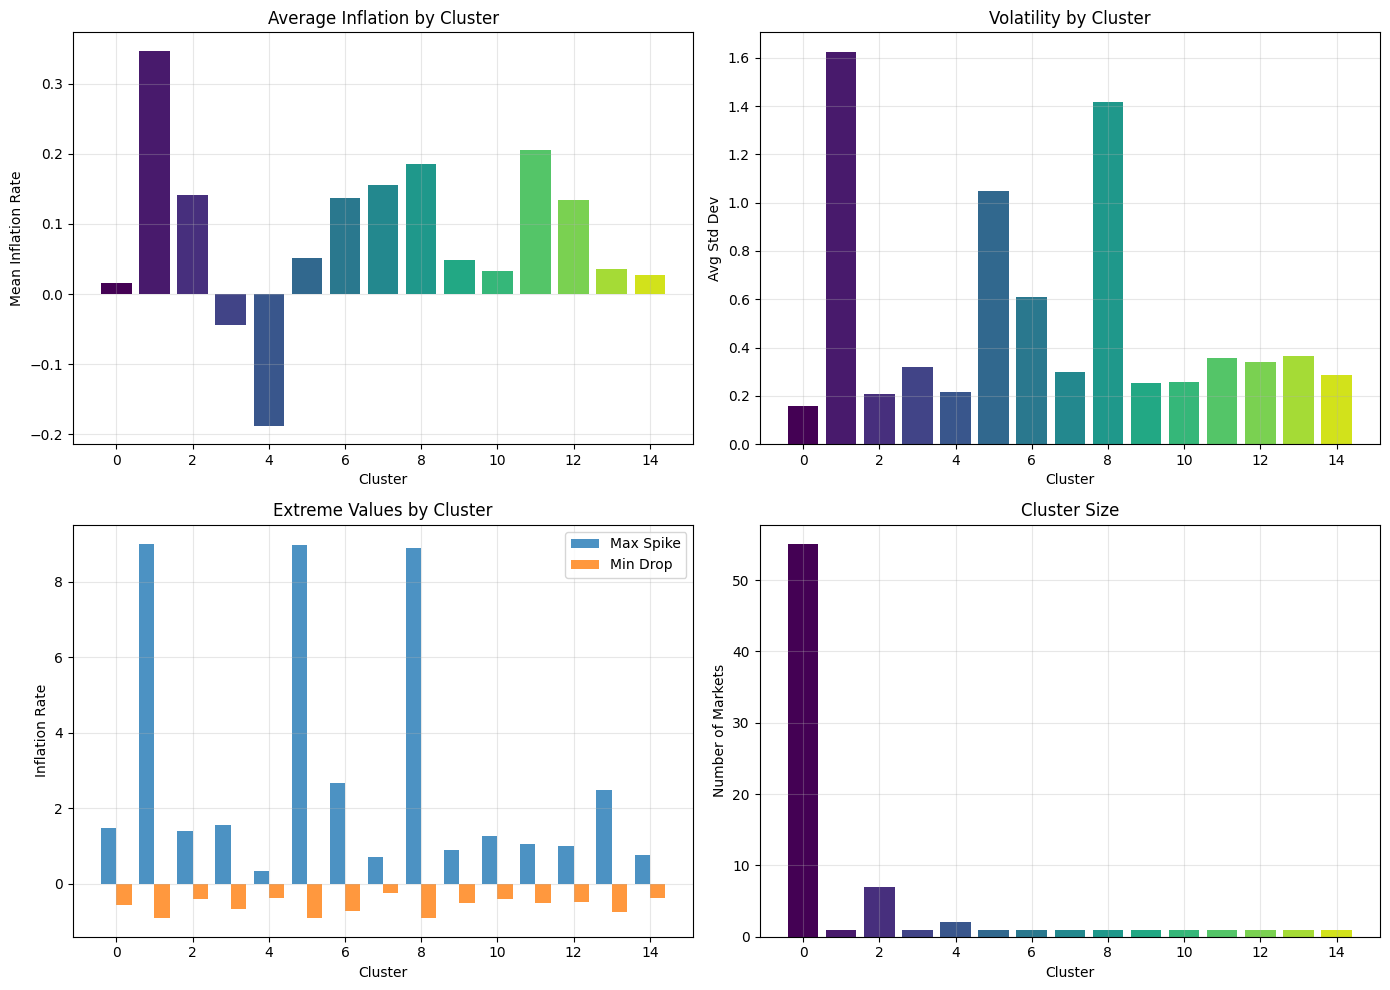


✅ Insights to look for:
  - High volatility clusters → vulnerable to shocks
  - Low mean inflation + low volatility → stable markets
  - High mean inflation → chronic price pressure


In [190]:
# ===================================================================
# VISUALIZATION 3: Cluster characteristics - volatility and extremes
# ===================================================================

cluster_stats = []

for cluster_id in range(optimal_k):
    cluster_markets_list = market_clusters[market_clusters['cluster'] == cluster_id]['market_id'].values
    cluster_data = inflation_pivot_clean[cluster_markets_list]
    
    stats = {
        'cluster': cluster_id,
        'n_markets': len(cluster_markets_list),
        'mean_inflation': cluster_data.mean().mean(),
        'std_inflation': cluster_data.std().mean(),
        'max_spike': cluster_data.max().max(),
        'min_drop': cluster_data.min().min(),
        'volatility': cluster_data.std().std(),  # Std of std across markets
    }
    cluster_stats.append(stats)

cluster_stats_df = pd.DataFrame(cluster_stats)
print("\n📊 Cluster Statistics Summary:")
print(cluster_stats_df.round(4))

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Mean inflation by cluster
axes[0, 0].bar(cluster_stats_df['cluster'], cluster_stats_df['mean_inflation'], 
               color=plt.cm.viridis(cluster_stats_df['cluster'] / optimal_k))
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Mean Inflation Rate')
axes[0, 0].set_title('Average Inflation by Cluster')
axes[0, 0].grid(True, alpha=0.3)

# 2. Volatility by cluster
axes[0, 1].bar(cluster_stats_df['cluster'], cluster_stats_df['std_inflation'], 
               color=plt.cm.viridis(cluster_stats_df['cluster'] / optimal_k))
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Avg Std Dev')
axes[0, 1].set_title('Volatility by Cluster')
axes[0, 1].grid(True, alpha=0.3)

# 3. Extreme values
x = cluster_stats_df['cluster']
axes[1, 0].bar(x - 0.2, cluster_stats_df['max_spike'], width=0.4, label='Max Spike', alpha=0.8)
axes[1, 0].bar(x + 0.2, cluster_stats_df['min_drop'], width=0.4, label='Min Drop', alpha=0.8)
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Inflation Rate')
axes[1, 0].set_title('Extreme Values by Cluster')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Number of markets per cluster
axes[1, 1].bar(cluster_stats_df['cluster'], cluster_stats_df['n_markets'], 
               color=plt.cm.viridis(cluster_stats_df['cluster'] / optimal_k))
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Markets')
axes[1, 1].set_title('Cluster Size')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Insights to look for:")
print("  - High volatility clusters → vulnerable to shocks")
print("  - Low mean inflation + low volatility → stable markets")
print("  - High mean inflation → chronic price pressure")


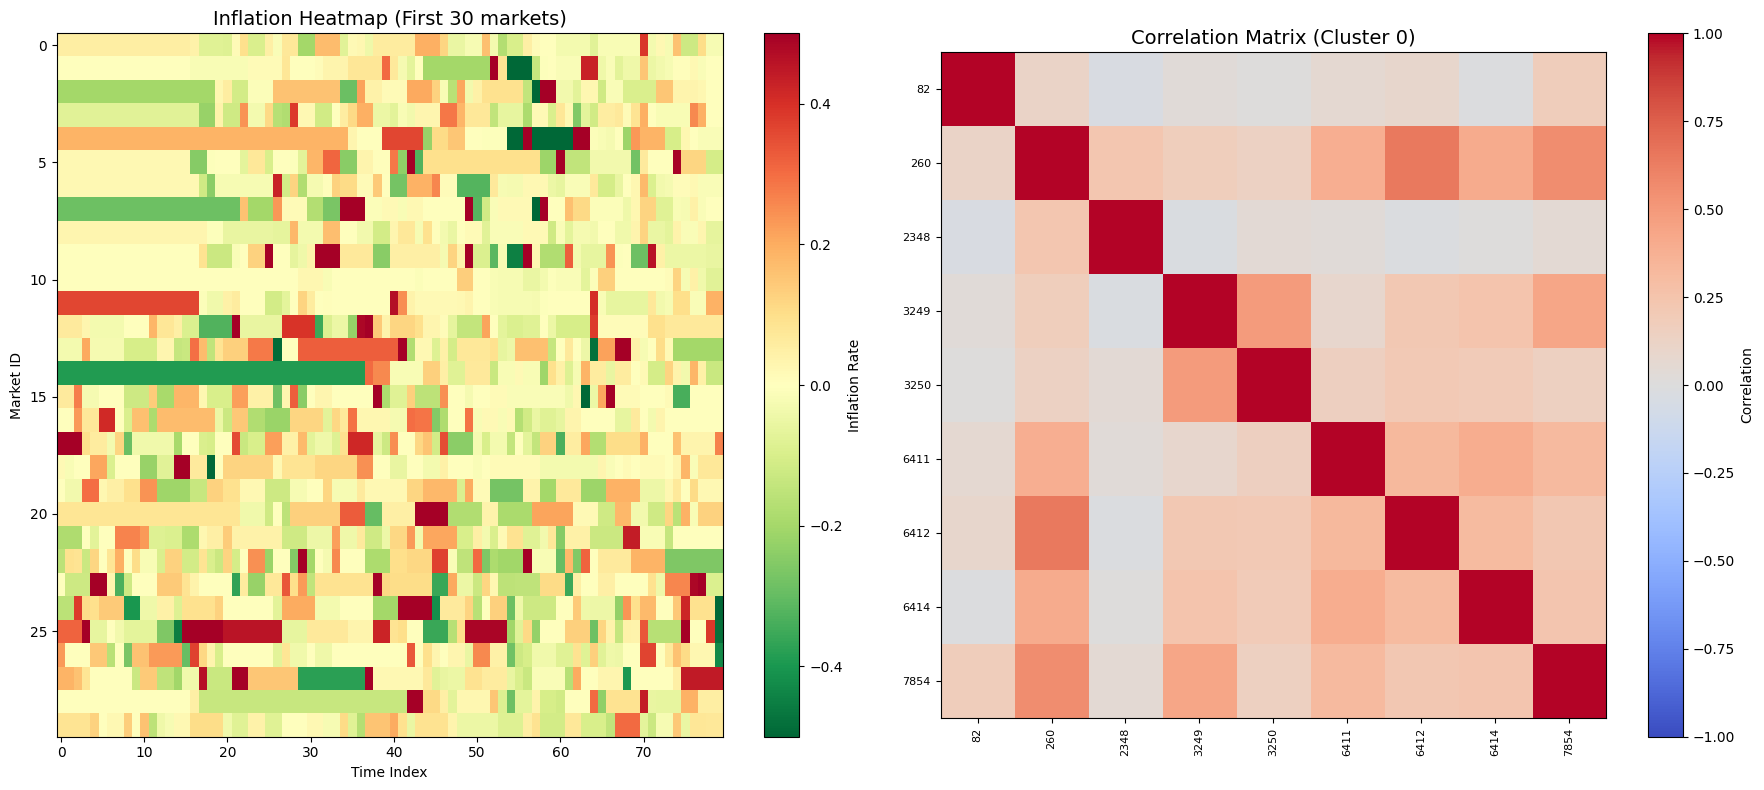


✅ Insights:
  - Vertical red/green bands → synchronized shocks across markets
  - High correlation within cluster → markets move together
  - Low correlation → diverse price drivers


In [176]:
# ===================================================================
# VISUALIZATION 4: Heatmap of inflation patterns
# ===================================================================

# Select a subset of markets for better visibility
n_markets_to_show = min(30, len(inflation_pivot_clean.columns))
sample_markets = inflation_pivot_clean.columns[:n_markets_to_show]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 4a. Heatmap of raw inflation values
im1 = axes[0].imshow(inflation_pivot_clean[sample_markets].T, 
                     aspect='auto', cmap='RdYlGn_r', 
                     vmin=-0.5, vmax=0.5)
axes[0].set_title(f'Inflation Heatmap (First {n_markets_to_show} markets)', fontsize=14)
axes[0].set_xlabel('Time Index')
axes[0].set_ylabel('Market ID')
plt.colorbar(im1, ax=axes[0], label='Inflation Rate')

# 4b. Correlation matrix within clusters
# Pick a cluster to analyze
cluster_to_analyze = 0
cluster_markets_subset = market_clusters[market_clusters['cluster'] == cluster_to_analyze]['market_id'].values
cluster_markets_subset = [m for m in cluster_markets_subset if m in inflation_pivot_clean.columns][:15]

if len(cluster_markets_subset) > 1:
    corr_matrix = inflation_pivot_clean[cluster_markets_subset].corr()
    im2 = axes[1].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title(f'Correlation Matrix (Cluster {cluster_to_analyze})', fontsize=14)
    axes[1].set_xticks(range(len(cluster_markets_subset)))
    axes[1].set_yticks(range(len(cluster_markets_subset)))
    axes[1].set_xticklabels(cluster_markets_subset, rotation=90, fontsize=8)
    axes[1].set_yticklabels(cluster_markets_subset, fontsize=8)
    plt.colorbar(im2, ax=axes[1], label='Correlation')

plt.tight_layout()
plt.show()

print("\n✅ Insights:")
print("  - Vertical red/green bands → synchronized shocks across markets")
print("  - High correlation within cluster → markets move together")
print("  - Low correlation → diverse price drivers")


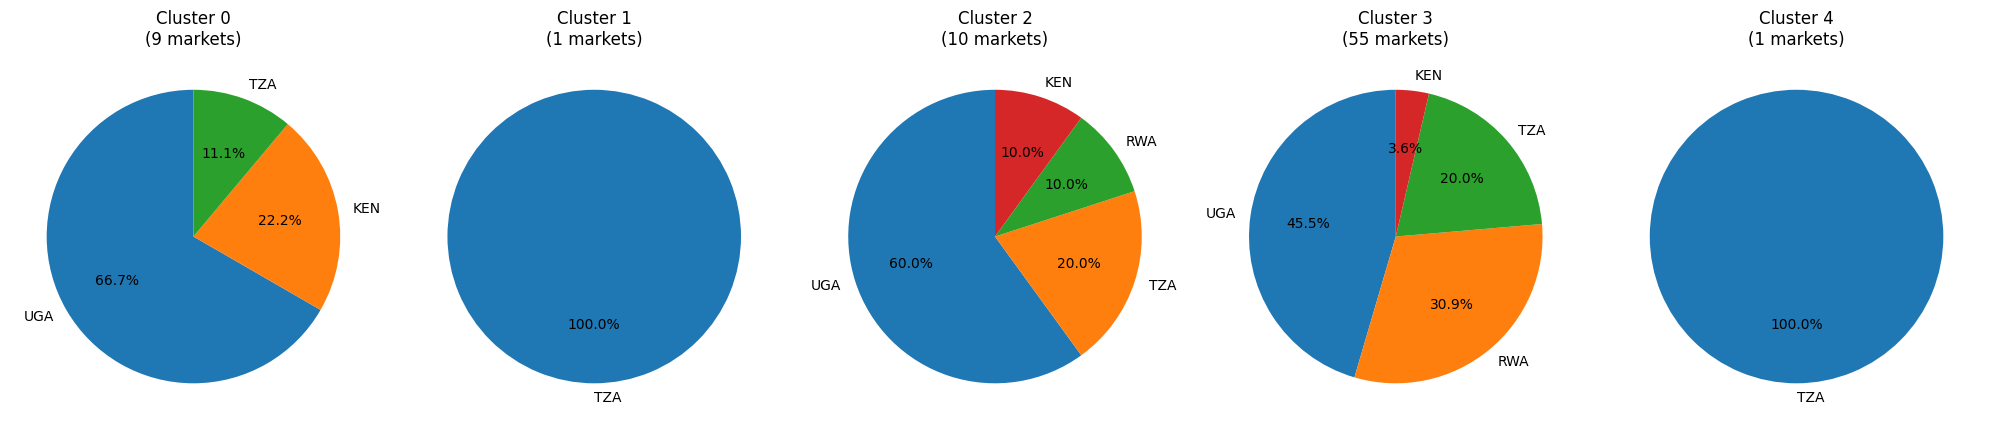


✅ Insight: Are clusters country-specific or cross-border?


In [177]:
# ===================================================================
# VISUALIZATION 5: Country composition of each cluster
# ===================================================================

fig, axes = plt.subplots(1, optimal_k, figsize=(4*optimal_k, 5))
if optimal_k == 1:
    axes = [axes]

for cluster_id in range(optimal_k):
    cluster_data = market_clusters[market_clusters['cluster'] == cluster_id]
    country_counts = cluster_data['countryiso3'].value_counts()
    
    axes[cluster_id].pie(country_counts.values, labels=country_counts.index, 
                        autopct='%1.1f%%', startangle=90)
    axes[cluster_id].set_title(f'Cluster {cluster_id}\n({len(cluster_data)} markets)')

plt.tight_layout()
plt.show()

print("\n✅ Insight: Are clusters country-specific or cross-border?")


# 3. CHIRPS Climate Data Analysis (Geospatial Precipitation Data)

This section analyzes precipitation data from CHIRPS GeoTIFF files.

**Purpose:**
- Load and visualize spatial precipitation patterns across Eastern Africa
- Analyze temporal trends from 2015-2025
- Prepare geospatial data structure for merging with WFP market locations

**Data Structure:**
- GeoTIFF raster files with monthly precipitation (mm)
- Spatial coverage: Eastern Africa region
- Temporal resolution: Monthly (2015-2025)

In [120]:
import geopandas as gpd

# Load CHIRPS precipitation data (full Africa, EPSG:4326)
rainfall = gpd.read_parquet("../data/processed/chirps_all_geopandas.parquet")
len(rainfall)


15819285

In [121]:
sorgum_price.head()

,countryiso3,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,...,priceflag,pricetype,currency,price,usdprice,unit_denomination,per_unit_price,inflation_rate,log_inflation,cluster
18393,TZA,2020-05-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,72357.0,31.34,100,0.3134,0.054154,0.052739,0
19492,TZA,2020-06-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,75500.0,32.68,100,0.3268,0.042757,0.041868,0
20937,TZA,2020-07-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,69500.0,30.03,100,0.3003,-0.081089,-0.084566,7
25361,TZA,2020-10-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,63800.0,27.56,100,0.2756,-0.082251,-0.085831,7
26038,TZA,2020-11-15,Arusha,Arusha Urban,Arusha (urban),80,-3.37,36.68,cereals and tubers,Sorghum,...,actual,Wholesale,TZS,64875.0,27.96,100,0.2796,0.014514,0.014409,0


# 4. Spatial Merging: WFP Food Prices + CHIRPS Precipitation

This section merges market-level sorghum price data with CHIRPS precipitation data using spatial proximity methods.

**Challenge:**
- WFP markets have exact lat/lon coordinates (sparse points)
- CHIRPS data is gridded at ~0.5° resolution (dense grid)
- Exact coordinate matching won't work → need spatial aggregation

**Solutions:**
1. **H3 (Hexagonal Hierarchical Geospatial Indexing)** - Modern, flexible spatial binning
2. **Grid-based matching** - Simple, interpretable grid cells

Both methods will be demonstrated below.


In [104]:
# Check rainfall (CHIRPS) data structure
print("📊 CHIRPS Precipitation Data:")
print(f"  - Shape: {rainfall.shape}")
print(f"  - Date range: {rainfall['date'].min()} to {rainfall['date'].max()}")
print(f"  - Spatial extent:")
print(f"    Longitude: {rainfall['lon'].min():.2f} to {rainfall['lon'].max():.2f}")
print(f"    Latitude: {rainfall['lat'].min():.2f} to {rainfall['lat'].max():.2f}")
print(f"  - Grid resolution: ~{abs(rainfall['lon'].diff().mode()[0]):.3f}°")
print()

# Check sorghum price data structure
print("📊 Sorghum Price Data:")
print(f"  - Shape: {sorgum_price.shape}")
print(f"  - Unique markets: {sorgum_price['market_id'].nunique()}")
print(f"  - Date range: {sorgum_price['date'].min()} to {sorgum_price['date'].max()}")
print(f"  - Spatial extent:")
print(f"    Longitude: {sorgum_price['longitude'].min():.2f} to {sorgum_price['longitude'].max():.2f}")
print(f"    Latitude: {sorgum_price['latitude'].min():.2f} to {sorgum_price['latitude'].max():.2f}")
print()

# Check for markets with missing coordinates
missing_coords = sorgum_price[sorgum_price[['latitude', 'longitude']].isna().any(axis=1)]
print(f"⚠️  Markets with missing coordinates: {len(missing_coords)} / {len(sorgum_price)}")


📊 CHIRPS Precipitation Data:
  - Shape: (5695835, 5)
  - Date range: 2015-12 to 2025-08
  - Spatial extent:
    Longitude: -17.97 to 54.78
    Latitude: -37.28 to 39.97
  - Grid resolution: ~0.250°

📊 Sorghum Price Data:
  - Shape: (3336, 22)
  - Unique markets: 161
  - Date range: 2019-02-15 to 2025-09-15
  - Spatial extent:
    Longitude: 29.31 to 43.13
    Latitude: -10.68 to 13.50

⚠️  Markets with missing coordinates: 0 / 3336


In [122]:
# Install h3 if needed: pip install h3
import h3

# Choose H3 resolution (6 ≈ 36 km² cells, good balance for regional analysis)
H3_RESOLUTION = 5

# ===================================================================
# Step 0: Normalize dates to Year-Month with day=1
# ===================================================================
print("🔧 Normalizing dates to Year-Month (YYYY-MM-01)...")

# CHIRPS: Convert 'YYYY-MM' string to datetime with day=1
rainfall_prep = rainfall.copy()
rainfall_prep['date'] = pd.to_datetime(rainfall_prep['date'], format='%Y-%m')  # Already gives day=1

# Sorghum: Truncate to first day of month
sorgum_price_prep = sorgum_price.dropna(subset=['latitude', 'longitude']).copy()
sorgum_price_prep['date'] = pd.to_datetime(sorgum_price_prep['date'])
sorgum_price_prep['date'] = sorgum_price_prep['date'].dt.to_period('M').dt.to_timestamp()  # Year-Month with day=1

print(f"  Rainfall date range: {rainfall_prep['date'].min()} to {rainfall_prep['date'].max()}")
print(f"  Price date range (before monthly agg): {sorgum_price_prep['date'].min()} to {sorgum_price_prep['date'].max()}")

# ===================================================================
# Step 1: Add H3 index to CHIRPS data
# ===================================================================
print("\n🔧 Adding H3 index to CHIRPS data...")
rainfall_prep['h3_index'] = rainfall_prep.apply(
    lambda row: h3.latlng_to_cell(row['lat'], row['lon'], H3_RESOLUTION), 
    axis=1
)

# ===================================================================
# Step 2: Add H3 index to sorghum price data
# ===================================================================
print("🔧 Adding H3 index to sorghum price data...")
sorgum_price_prep['h3_index'] = sorgum_price_prep.apply(
    lambda row: h3.latlng_to_cell(row['latitude'], row['longitude'], H3_RESOLUTION),
    axis=1
)


🔧 Normalizing dates to Year-Month (YYYY-MM-01)...
  Rainfall date range: 2015-12-01 00:00:00 to 2025-08-01 00:00:00
  Price date range (before monthly agg): 2019-02-01 00:00:00 to 2025-09-01 00:00:00

🔧 Adding H3 index to CHIRPS data...
🔧 Adding H3 index to sorghum price data...


In [144]:
rainfall_prep.head()
rainfall_avg = rainfall_prep.groupby(['date', 'h3_index']).agg({'precipitation': 'mean'}).reset_index()
rainfall_avg.head()

,date,h3_index,precipitation
0,2015-12-01,851e8a2bfffffff,134.807983
1,2015-12-01,851e8a2ffffffff,131.239578
2,2015-12-01,851e8a43fffffff,100.933128
3,2015-12-01,851e8a47fffffff,116.267433
4,2015-12-01,851e8a5bfffffff,84.552406


In [208]:
sorgum_price_avg = sorgum_price_prep.groupby(['h3_index','countryiso3', 'date']).agg({'per_unit_price': 'mean', 'market_id': 'count'}).reset_index()
sorgum_price_avg

,h3_index,countryiso3,date,per_unit_price,market_id
0,85528567fffffff,ETH,2019-08-01,0.5132,1
1,85528567fffffff,ETH,2019-10-01,0.5856,1
2,85528567fffffff,ETH,2019-12-01,0.6020,1
3,85528567fffffff,ETH,2020-01-01,0.5988,1
4,85528567fffffff,ETH,2020-02-01,0.3860,1
...,...,...,...,...,...
2861,859799bbfffffff,TZA,2024-10-01,0.1890,1
2862,859799bbfffffff,TZA,2025-01-01,0.2305,1
2863,859799bbfffffff,TZA,2025-02-01,0.2228,1
2864,859799bbfffffff,TZA,2025-03-01,0.2177,1


In [209]:
merge = pd.merge(rainfall_avg, sorgum_price_avg, on=['h3_index','date'], how='outer')

In [211]:
merge.head()
merge.rename(columns={'market_id': 'n_markets'}, inplace=True)
merge.head()

,date,h3_index,precipitation,countryiso3,per_unit_price,n_markets
0,2015-12-01,851e8a2bfffffff,134.807983,NaN,NaN,NaN
1,2016-01-01,851e8a2bfffffff,214.068619,NaN,NaN,NaN
2,2016-02-01,851e8a2bfffffff,169.246017,NaN,NaN,NaN
3,2016-03-01,851e8a2bfffffff,146.297302,NaN,NaN,NaN
4,2016-04-01,851e8a2bfffffff,108.880539,NaN,NaN,NaN


In [212]:
merge['inflation_rate'] = merge.groupby(['h3_index', 'countryiso3'])['per_unit_price'].pct_change(1)
merge.to_csv('../data/processed/sorghum_price_with_precipitation_h3_5.csv', index=False)

In [214]:
len(merge)

14003000

### viz

In [ ]:
# ===================================================================
# 전체 아프리카 범위 오버레이
# ===================================================================
fig = go.Figure()

# CHIRPS 데이터
fig.add_trace(go.Scattergeo(
    lon=rainfall_sample['lon'],
    lat=rainfall_sample['lat'],
    mode='markers',
    marker=dict(
        size=2,
        color=rainfall_sample['precipitation'],
        colorscale='Blues',
        colorbar=dict(title="Precip (mm)"),
        opacity=0.5
    ),
    name='CHIRPS',
    hoverinfo='skip'  # 너무 많아서 hover 끔
))

# Markets
fig.add_trace(go.Scattergeo(
    lon=markets['longitude'],
    lat=markets['latitude'],
    mode='markers',
    marker=dict(size=12, color='red', symbol='star', line=dict(width=1.5, color='white')),
    name='Markets',
    text=markets['market'],
    hovertemplate='<b>%{text}</b><extra></extra>'
))

fig.update_geos(
    scope='africa',
    projection_type='natural earth',
    showland=True,
    landcolor='lightgray'
)

fig.update_layout(
    title='CHIRPS Coverage vs Sorghum Markets',
    height=700
)

fig.show()

📊 Displayed:
   CHIRPS points: 5,000
   Sorghum markets: 161


#### modeling - temperature and sorguhm price

In [156]:
# ===================================================================
# 1. Correlation Analysis
# ===================================================================
print("📊 Correlation between Precipitation Features and Price Inflation:\n")

final_data = merge
# Select numeric columns related to precipitation and price
precip_features = [col for col in final_data.columns if 'precip' in col or 'drought' in col or 'dry' in col]
price_vars = ['inflation_rate', 'per_unit_price']

# Calculate correlations
correlations = final_data[precip_features + price_vars].corr()[price_vars].loc[precip_features]

# Show top correlations for inflation_rate
print("Top correlations with inflation_rate:")
top_corr = correlations['inflation_rate'].dropna().abs().sort_values(ascending=False).head(10)
for feat, corr in top_corr.items():
    direction = "↑" if correlations.loc[feat, 'inflation_rate'] > 0 else "↓"
    print(f"  {direction} {feat:30s}: {correlations.loc[feat, 'inflation_rate']:+.4f}")



📊 Correlation between Precipitation Features and Price Inflation:

Top correlations with inflation_rate:
  ↑ precipitation                 : +0.0648


In [197]:
merge = merge.dropna(subset=['precipitation', 'per_unit_price', 'inflation_rate']).head()
merge.head()

,date,h3_index,precipitation,countryiso3,per_unit_price,inflation_rate
4045630,2019-10-01,85528567fffffff,16.631458,ETH,0.5856,0.141076
4045632,2019-12-01,85528567fffffff,12.284818,ETH,0.6020,0.028005
4045633,2020-01-01,85528567fffffff,12.284912,ETH,0.5988,-0.005316
4045634,2020-02-01,85528567fffffff,17.502647,ETH,0.3860,-0.355377
4045635,2020-03-01,85528567fffffff,59.226151,ETH,0.3853,-0.001813


In [ ]:

# ===================================================================
# 2. Drought Impact Analysis
# ===================================================================
print("\n\n📊 Price Dynamics: Drought vs Normal Conditions:\n")

drought_impact = final_data.groupby('is_drought').agg({
    'inflation_rate': ['mean', 'std', 'count'],
    'per_unit_price': ['mean', 'median']
}).round(4)

drought_impact.index = ['Normal', 'Drought']
print(drought_impact)

# Statistical test
from scipy import stats
drought_prices = final_data[final_data['is_drought'] == 1]['inflation_rate'].dropna()
normal_prices = final_data[final_data['is_drought'] == 0]['inflation_rate'].dropna()

if len(drought_prices) > 0 and len(normal_prices) > 0:
    t_stat, p_value = stats.ttest_ind(drought_prices, normal_prices, nan_policy='omit')
    print(f"\n📈 T-test: Drought vs Normal inflation")
    print(f"   t-statistic: {t_stat:.4f}")
    print(f"   p-value: {p_value:.4f}")
    print(f"   Significant at α=0.05: {'Yes ✓' if p_value < 0.05 else 'No ✗'}")

In [ ]:
# ===================================================================
# 3. Scatter Plot: Precipitation Anomaly vs Price Inflation
# ===================================================================
import plotly.express as px

# Remove outliers for better visualization
plot_data = final_data[
    (final_data['precip_anomaly'].notna()) & 
    (final_data['inflation_rate'].notna()) &
    (abs(final_data['inflation_rate']) < 0.5) &  # Remove extreme inflation outliers
    (abs(final_data['precip_anomaly']) < 3)       # Remove extreme precipitation outliers
].copy()

fig = px.scatter(
    plot_data.sample(min(5000, len(plot_data))),  # Sample for performance
    x='precip_anomaly',
    y='inflation_rate',
    color='countryiso3',
    opacity=0.5,
    trendline='ols',
    labels={
        'precip_anomaly': 'Precipitation Anomaly (Z-score)',
        'inflation_rate': 'Monthly Inflation Rate',
        'countryiso3': 'Country'
    },
    title='Precipitation Anomaly vs Food Price Inflation (Sorghum)',
    height=500
)

fig.add_hline(y=0, line_dash='dash', line_color='gray', opacity=0.5)
fig.add_vline(x=0, line_dash='dash', line_color='gray', opacity=0.5)

fig.show()

print(f"📊 Scatter plot sample size: {len(plot_data):,} observations")


In [ ]:
# ===================================================================
# Save merged dataset
# ===================================================================
output_path = "../data/processed/sorghum_price_with_precipitation_h3.parquet"
final_data.to_parquet(output_path, index=False)

print(f"✅ Dataset saved to: {output_path}")
print(f"   Shape: {final_data.shape}")
print(f"   Size: {os.path.getsize(output_path) / 1024 / 1024:.2f} MB")

# ===================================================================
# Also save grid-based version for comparison
# ===================================================================
output_path_grid = "../data/processed/sorghum_price_with_precipitation_grid.parquet"
merged_grid.to_parquet(output_path_grid, index=False)

print(f"\n✅ Grid-based dataset saved to: {output_path_grid}")
print(f"   Shape: {merged_grid.shape}")
print(f"   Size: {os.path.getsize(output_path_grid) / 1024 / 1024:.2f} MB")
